In [45]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

(150, 4)


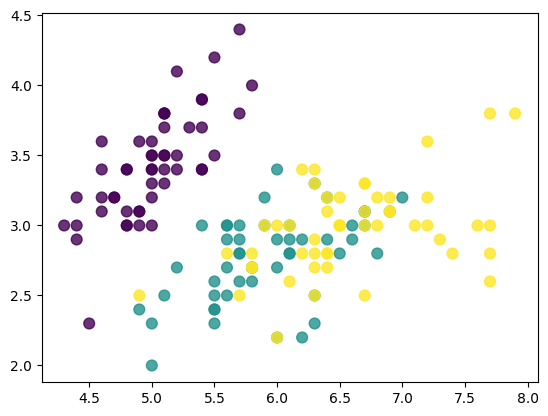

In [46]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8, s=60)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Text(0.5, 1.0, 'Test')

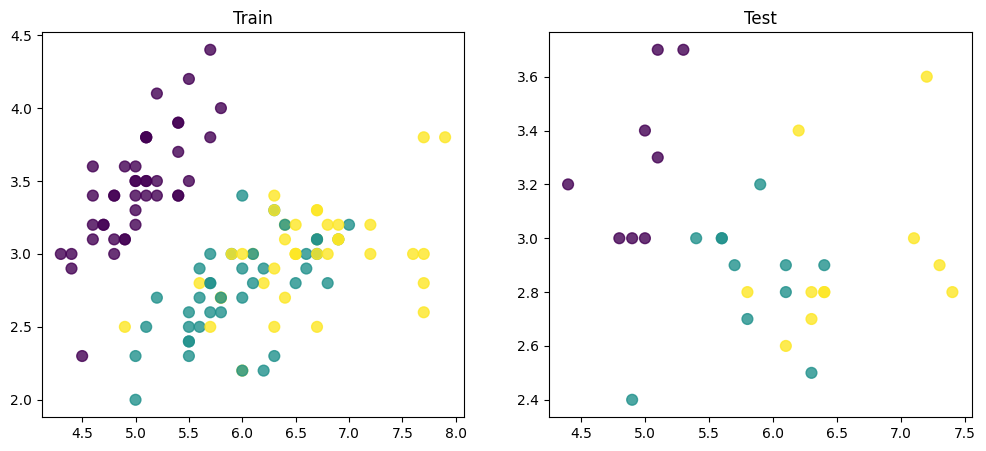

In [48]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8, s=60)
plt.title('Train')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8, s=60)
plt.title('Test')

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)

print("Train score", model.score(X_train, y_train))
print("Test score", model.score(X_test, y_test))


Train score 0.9833333333333333
Test score 0.9666666666666667


In [51]:
from sklearn.model_selection import cross_val_score, validation_curve

In [52]:
cross_val_score(KNeighborsClassifier(6), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9583333333333334

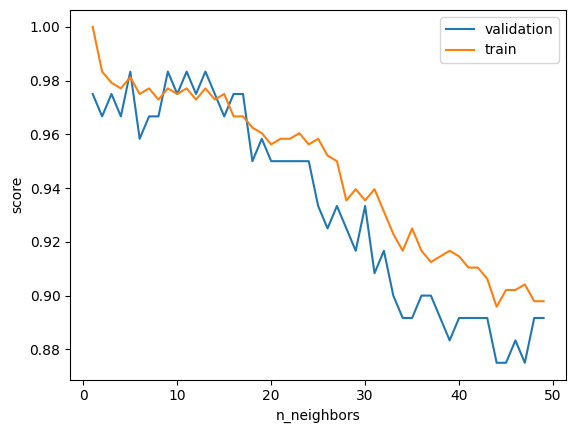

In [53]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {'n_neighbors': np.arange(1, 20),
                'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [56]:
grid.best_score_

0.9833333333333334

In [57]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [58]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

In [59]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

In [62]:
from sklearn.model_selection import learning_curve

In [67]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

[ 9 19 28 38 48 57 67 76 86 96]


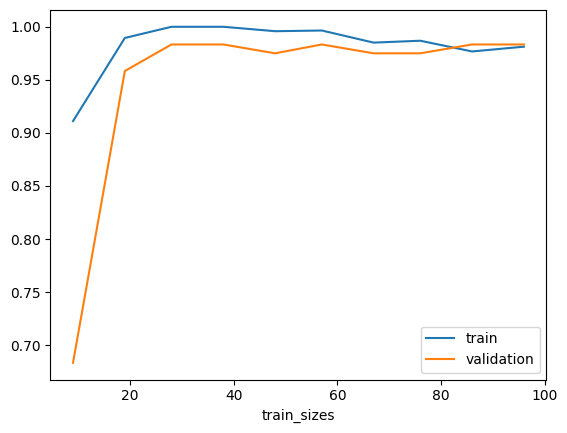

In [68]:
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()